<a href="https://colab.research.google.com/github/kushal-h/Deep-Learning-Implementations/blob/master/CNN/plant_disease_prediction_using_MobileNet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **@Author: Kushal H**

In [ ]:
from google.colab import files

files.upload()

In [2]:

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:22<00:00, 117MB/s]
100% 2.04G/2.04G [00:22<00:00, 97.8MB/s]


Unziping the dataset

In [ ]:
!unzip /content/plantvillage-dataset.zip

Import neccessary packages

## Using transfer learning MobileNet

In [5]:
!pip install split-folders

In [7]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [8]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(38,activation='softmax')(x) #final layer with softmax activation

17227776/17225924 [==============================] - 0s 0us/step


In [9]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [10]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [11]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio('/content/plantvillage dataset/segmented', output="output", seed=1337, ratio=(.8, .2),
                   group_prefix=None) # default values

Copying files: 54306 files [00:09, 5516.80 files/s]


In [12]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./output/train', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 43430 images belonging to 38 classes.


In [13]:
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

val_generator=train_datagen.flow_from_directory('./output/val', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 10876 images belonging to 38 classes.


In [19]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
accident_model=model.fit_generator(generator=train_generator,
                    validation_data =val_generator,
                   steps_per_epoch= step_size_train//50, 
                  epochs = 10                
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
27/27 [==============================] - 530s 20s/step - loss: 0.7603 - accuracy: 0.7805 - val_loss: 2.0871 - val_accuracy: 0.5431
Epoch 2/10
27/27 [==============================] - 526s 20s/step - loss: 0.8651 - accuracy: 0.7428 - val_loss: 1.2597 - val_accuracy: 0.7064
Epoch 3/10
27/27 [==============================] - 526s 20s/step - loss: 0.5959 - accuracy: 0.8310 - val_loss: 1.3315 - val_accuracy: 0.6786
Epoch 4/10
27/27 [==============================] - 526s 20s/step - loss: 0.5641 - accuracy: 0.8349 - val_loss: 0.9929 - val_accuracy: 0.7550
Epoch 5/10
27/27 [==============================] - 527s 20s/step - loss: 0.7010 - accuracy: 0.8078 - val_loss: 0.7106 - val_accuracy: 0.8158
Epoch 6/10
27/27 [==============================] - 524s 20s/step - loss: 0.3517 - accuracy: 0.8912 - val_loss: 1.0249 - val_accuracy: 0.7995
Epoch 7/10
27/27 [==============================] - 524s 20s/step - loss: 0.5349 - accuracy: 0.8364 - val_loss: 0.7663 - val_accuracy: 0.7854
Epoch 

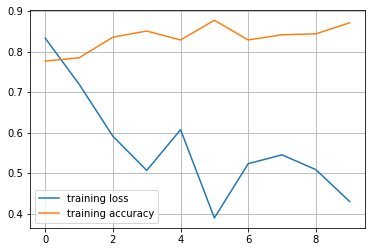

In [20]:
plt.plot(accident_model.history['loss'], label = 'training loss')
plt.plot(accident_model.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [21]:
print("Calculating Model Accuracy....")
accuracy_score = model.evaluate(val_generator)
print(f"Accuracy: {accuracy_score[1]*100}")

Calculating Model Accuracy....
340/340 [==============================] - 419s 1s/step - loss: 0.6162 - accuracy: 0.8263
Accuracy: 82.63148069381714


In [25]:
model.save('mobilenet.h5')

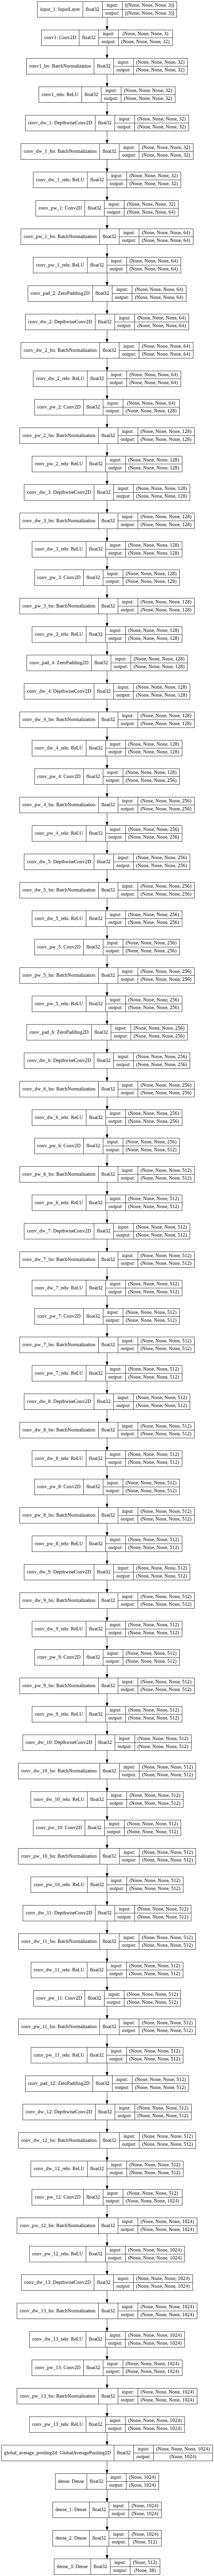

In [26]:
tf.keras.utils.plot_model(model, to_file = 'plant.png',  show_shapes = True, show_dtype = True, 
                          show_layer_names = True, rankdir='TB', expand_nested = True)

In [32]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [191]:
a=val_generator.filepaths
c = val_generator.labels
len(c)

10876

In [192]:
p = []
for x in a:
  test_image = image.load_img(x,  target_size=(227, 227))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  b = np.argmax(result)
  p.append(b)
 #print("the file is ",y,  "its predicted value is",b)


In [194]:
df = pd.DataFrame()
df['Orginal']  = c
df['Predict']  = p
df

,Orginal,Predict
0,0,8
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
10871,37,3
10872,37,16
10873,37,16
10874,37,0


In [195]:
df.to_csv('file1.csv')

In [120]:
np.argmax(result)

16

## Using transfer learning **MobileNet**